In [9]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.8.0


In [31]:
import torch_geometric
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [11]:
use_cuda_if_available = False

# Load the dataset

The Cora dataset consists of 2708 scientific publications classified into one of seven classes.
The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words.

In [4]:
dataset = Planetoid(root="tutorial1",name= "Cora")

##### Dataset properties

The Cora dataset contains 2708 papers, which are represented as nodes in the graph.

The papers in the Cora dataset have 5429 citation connections, which are represented as edges in the graph. The edge information is unique to graph data.

*Why the number of edges is twice as large as actual connections?*

=> Given that data is undirected, which means that it is bi-directional edge, the edge count is double.


In [17]:
print(dataset)
print("number of graphs:\t\t",len(dataset))
print("number of classes:\t\t",dataset.num_classes)
print("number of nodes:\t\t",dataset[0].num_nodes)              # # of nodes in graph
print("number of edges:\t\t",dataset[0].num_edges)              # # of edges in graph
print("number of node features:\t",dataset.num_node_features)       # # of features each node has
print("number of edge features:\t",dataset.num_edge_features)

print("Has isolated nodes:\t\t",dataset[0].has_isolated_nodes())
print("Has self-loops:\t\t\t",dataset[0].has_self_loops())
print("Is undirected:\t\t\t",dataset[0].is_undirected())

Cora()
number of graphs:		 1
number of classes:		 7
number of nodes:		 2708
number of edges:		 10556
number of node features:	 1433
number of edge features:	 0
Has isolated nodes:		 False
Has self-loops:			 False
Is undirected:			 True


##### Dataset shapes

In [ ]:
print(dataset.data)

# x:
# edge_index:
# y: node labels
# train_mask:
# val_mask:
# test_mask:

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


/var/folders/lm/1f9_svz57ts1ynyk34tzhv5w0000gr/T/ipykernel_38993/2657384431.py:1: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  print(dataset.data)


In [ ]:
print("edge_index:\t\t",dataset.data.edge_index.shape)
print(dataset.data.edge_index)
print("\n")
print("train_mask:\t\t",dataset.data.train_mask.shape)
print(dataset.data.train_mask)
print("\n")
print("x:\t\t",dataset.data.x.shape)
print(dataset.data.x)
print("\n")
print("y:\t\t",dataset.data.y.shape)
print(dataset.data.y)

edge_index:		 torch.Size([2, 10556])
tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])


train_mask:		 torch.Size([2708])
tensor([ True,  True,  True,  ..., False, False, False])


x:		 torch.Size([2708, 1433])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


y:		 torch.Size([2708])
tensor([3, 4, 4,  ..., 3, 3, 3])


/var/folders/lm/1f9_svz57ts1ynyk34tzhv5w0000gr/T/ipykernel_38993/1449464388.py:1: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  print("edge_index:\t\t",dataset.data.edge_index.shape)
/var/folders/lm/1f9_svz57ts1ynyk34tzhv5w0000gr/T/ipykernel_38993/1449464388.py:2: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  print(dataset.data.edge_index)
/var/folders/lm/1f9_svz57ts1ynyk34

##### Edges

Explore how edge information is stored. Get the pairs of nodes to which the edges are connected.

In [20]:
edge_index = dataset[0].edge_index.numpy()
print(edge_index.shape)
edge_example = edge_index[:, np.where(edge_index[0]==30)[0]]        # Look at the edge held by the 30th node
print(edge_example)

(2, 10556)
[[  30   30   30   30   30   30]
 [ 697  738 1358 1416 2162 2343]]


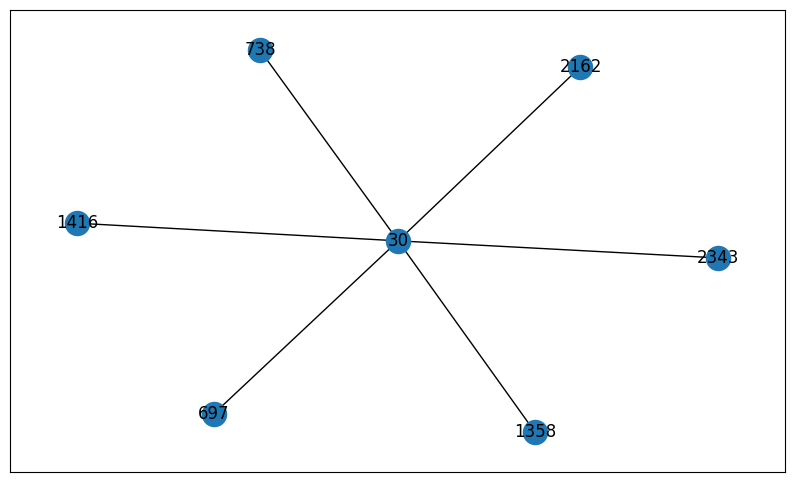

In [23]:
node_example = np.unique(edge_example.flatten())

plt.figure(figsize=(10, 6))
G = nx.Graph()
G.add_nodes_from(node_example)
G.add_edges_from(list(zip(edge_example[0], edge_example[1])))
nx.draw_networkx(G, with_labels=True)

##### Node Degree

Degree in graph theory means the number of edges joining a vertex (node) in a graph. How many edges does each node have on average?

In [28]:
print("Average node degree:\t", round(dataset[0].num_edges / dataset[0].num_nodes, 3))

Average node degree:	 3.898


,count,mean,std,min,25%,50%,75%,max
0,2708.0,3.9,5.23,1.0,2.0,3.0,5.0,168.0


2708
10556


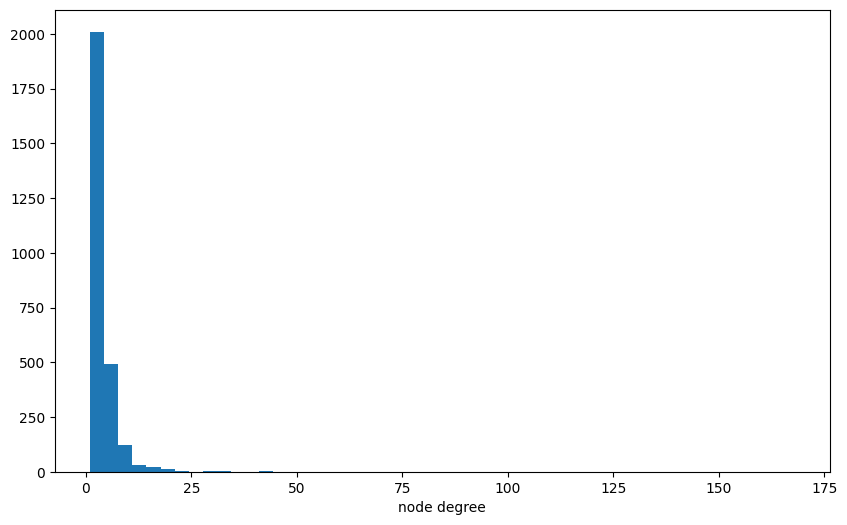

In [32]:
G = to_networkx(dataset[0], to_undirected=True)
degrees = [val for (node, val) in G.degree()]

display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))

print(len(degrees))
print(sum(degrees))  # Should be equal to 2 * number of edges

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50)
plt.xlabel("node degree")
plt.show()

Higher degree means more citations were made, in other words, more important. The top 10 nodes (yellow) with the highest degrees are as follows.

Threshold 0.011821204285186553


/Users/sryu/anaconda3/envs/torch-geometric-py312/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


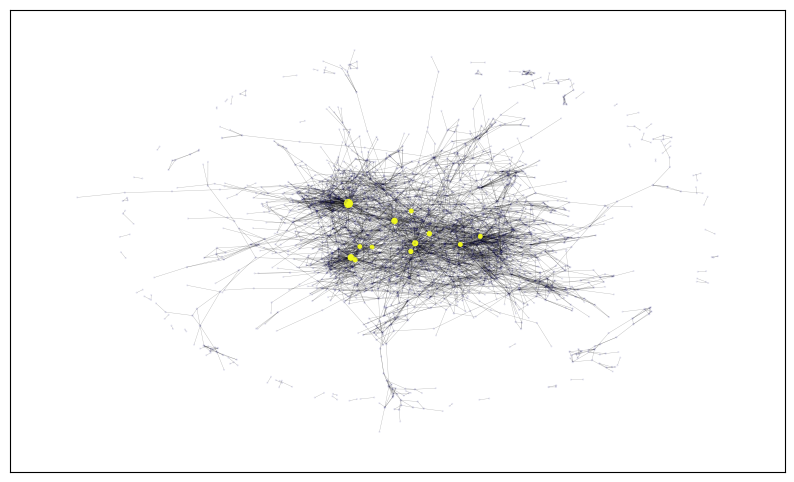

In [34]:
G = to_networkx(dataset[0], to_undirected=True)
pos = nx.spring_layout(G, seed=42)

cent = nx.degree_centrality(G)
node_size = list(map(lambda x: x * 500, cent.values()))

cent_array = np.array(list(cent.values()))
threshold = sorted(cent_array, reverse=True)[10]
print("Threshold", threshold)
cent_bin = np.where(cent_array >= threshold, 1, 0.1)

plt.figure(figsize=(10, 6))
nodes = nx.draw_networkx_nodes(G, pos,
                               node_size=node_size,
                               cmap=plt.cm.plasma,
                               node_color=cent_bin,
                               nodelist=list(cent.keys()),
                               alpha=cent_bin)

edges = nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.3)

plt.show()

##### Features

In [11]:
import os.path as osp

import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv


In [12]:
data = dataset[0]

In [13]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv = SAGEConv(dataset.num_features,
                             dataset.num_classes,
                             aggr="max") # max, mean, add ...)

    def forward(self):
        x = self.conv(data.x, data.edge_index)
        return F.log_softmax(x, dim=1)
    

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() and use_cuda_if_available else 'cpu')
model, data = Net().to(device), data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

In [15]:
device

device(type='cpu')

In [16]:
def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
    optimizer.step()


def test():
    model.eval()
    logits, accs = model(), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs

In [17]:
best_val_acc = test_acc = 0
for epoch in range(1,100):
    train()
    _, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    log = 'Epoch: {:03d}, Val: {:.4f}, Test: {:.4f}'
    
    if epoch % 10 == 0:
        print(log.format(epoch, best_val_acc, test_acc))

Epoch: 010, Val: 0.7260, Test: 0.7140
Epoch: 020, Val: 0.7260, Test: 0.7140


KeyboardInterrupt: 